In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from numpy.exceptions import AxisError
import pandas as pd
from scipy import stats

from sqlalchemy import create_engine, Table, Column, Integer, String, MetaData, Integer, String, insert, select

engine = create_engine("sqlite+pysqlite:///GPSdata1.db", echo=False)

metadata_obj = MetaData()

players_table = Table("players", metadata_obj, autoload_with=engine)
sessions_data_table = Table("sessions_data", metadata_obj, autoload_with=engine)

In [3]:
with engine.connect() as conn:
    stmt = (
        select(players_table, sessions_data_table)
        .join(sessions_data_table, players_table.c.id == sessions_data_table.c.player_id)
        .order_by(players_table.c.team)
    )

    data = conn.execute(stmt).mappings().all()

df = pd.DataFrame(data)

df.head()

,Accels + Decels,Accels + Decels /min,Dis/min,Distance,Duration,HSR,HSR/min,PlayerLoad,SD,SD/min,Top Speed,id,match_id,player_id,position,team
0,141,1.473611,99.4609,9516.8,95.683333,282.8,2.955583,352.6516,124.0,1.295941,28.3682,1,1,1,CB,1st
1,120,1.233510,98.4719,9579.7,97.283333,465.3,4.782936,345.9358,109.3,1.123522,30.2722,1,2,1,CB,1st
2,140,1.481743,97.0324,9167.9,94.483333,249.9,2.644911,348.6969,80.5,0.852002,27.8882,1,3,1,CB,1st
3,132,1.328191,98.8781,9826.8,99.383333,385.1,3.874895,365.7599,75.5,0.759685,28.6082,1,4,1,CB,1st
4,123,1.245570,98.8032,9756.8,98.750000,440.9,4.464810,360.1288,47.0,0.475949,30.1282,1,5,1,CB,1st


In [9]:
X = df.drop(["id", "match_id", "player_id"], axis=1)

X.head()

,Accels + Decels,Accels + Decels /min,Dis/min,Distance,Duration,HSR,HSR/min,PlayerLoad,SD,SD/min,Top Speed,position,team
0,141,1.473611,99.4609,9516.8,95.683333,282.8,2.955583,352.6516,124.0,1.295941,28.3682,CB,1st
1,120,1.233510,98.4719,9579.7,97.283333,465.3,4.782936,345.9358,109.3,1.123522,30.2722,CB,1st
2,140,1.481743,97.0324,9167.9,94.483333,249.9,2.644911,348.6969,80.5,0.852002,27.8882,CB,1st
3,132,1.328191,98.8781,9826.8,99.383333,385.1,3.874895,365.7599,75.5,0.759685,28.6082,CB,1st
4,123,1.245570,98.8032,9756.8,98.750000,440.9,4.464810,360.1288,47.0,0.475949,30.1282,CB,1st


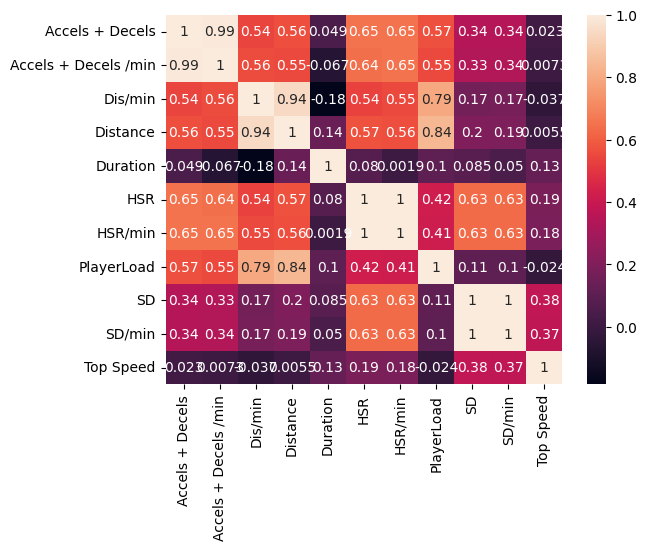

In [ ]:
corrMatrix = X.corr(numeric_only=True)
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
categoric_features = X.select_dtypes(exclude='number').columns.to_list()
numeric_features = X.select_dtypes(include='number').columns.to_list()
categoric_features

['position', 'team']

In [14]:
X_with_dummies = pd.concat(
    [
        X[numeric_features],
        pd.get_dummies(X[categoric_features])
    ],
    axis=1
)

In [15]:
X_with_dummies

,Accels + Decels,Accels + Decels /min,Dis/min,Distance,Duration,HSR,HSR/min,PlayerLoad,SD,SD/min,Top Speed,position_CB,position_CM,position_FB,position_FWD,team_1st,team_U17,team_U18,team_U23
0,141,1.473611,99.460900,9516.8,95.683333,282.8,2.955583,352.6516,124.0,1.295941,28.36820,True,False,False,False,True,False,False,False
1,120,1.233510,98.471900,9579.7,97.283333,465.3,4.782936,345.9358,109.3,1.123522,30.27220,True,False,False,False,True,False,False,False
2,140,1.481743,97.032400,9167.9,94.483333,249.9,2.644911,348.6969,80.5,0.852002,27.88820,True,False,False,False,True,False,False,False
3,132,1.328191,98.878100,9826.8,99.383333,385.1,3.874895,365.7599,75.5,0.759685,28.60820,True,False,False,False,True,False,False,False
4,123,1.245570,98.803200,9756.8,98.750000,440.9,4.464810,360.1288,47.0,0.475949,30.12820,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,257,2.492726,96.219205,9920.2,103.100000,726.5,7.046557,388.7173,198.0,1.920466,31.00824,False,False,False,True,False,False,False,True
559,208,2.234157,101.198711,9421.6,93.100000,696.8,7.484425,358.3715,325.4,3.495166,31.40028,False,False,False,True,False,False,False,True
560,176,1.726054,108.048055,11017.3,101.966667,811.0,7.953580,404.1736,284.8,2.793070,30.76812,False,False,False,True,False,False,False,True
561,232,2.412897,99.970879,9612.2,96.150000,679.2,7.063963,376.9603,113.3,1.178367,28.76832,False,False,False,True,False,False,False,True
